# ***Table of content***

***1-Business Problem***

***2-Data understanding***

***3-Data Cleaning and Feature Engineering***

***4-Data Visualization and hypothesis***

***5-Conclusion***

#  *Business problem*

*The main purpose of this notebook is to understand the market before investing in the Cab industry according to Go-to-Market(G2M)strategy.*
*G2M tends to focus on the short-term,but effective ones will also consider how any immediate success can be sustained over a longer period.*

## *Data Understanding and Preparation*

Import libraries


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go
import plotly
import plotly.graph_objects as go
from datetime import datetime, timedelta
import plotly.express as  px
%pylab inline
pylab.rcParams['figure.figsize'] = (10, 6)
import math


%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\magics\pylab.py:162: UserWarning: pylab import has clobbered these variables: ['datetime']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


Read datasets

In [2]:
City = pd.read_csv('City.csv')
City

,City,Population,Users
0,NEW YORK NY,"8,405,837","302,149"
1,CHICAGO IL,"1,955,130","164,468"
2,LOS ANGELES CA,"1,595,037","144,132"
3,MIAMI FL,"1,339,155","17,675"
4,SILICON VALLEY,"1,177,609","27,247"
5,ORANGE COUNTY,"1,030,185","12,994"
6,SAN DIEGO CA,"959,307","69,995"
7,PHOENIX AZ,"943,999","6,133"
8,DALLAS TX,"942,908","22,157"
9,ATLANTA GA,"814,885","24,701"


In [3]:
City.dtypes

City          object
Population    object
Users         object
dtype: object

In [4]:
City.shape

(20, 3)

In [5]:
Cab_Data = pd.read_csv('Cab_Data.csv')
Cab_Data

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.6350
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.8540
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.6320
3,10000014,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.6020
4,10000015,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.7760
...,...,...,...,...,...,...,...
359387,10440101,43108,Yellow Cab,WASHINGTON DC,4.80,69.24,63.3600
359388,10440104,43104,Yellow Cab,WASHINGTON DC,8.40,113.75,106.8480
359389,10440105,43105,Yellow Cab,WASHINGTON DC,27.75,437.07,349.6500
359390,10440106,43105,Yellow Cab,WASHINGTON DC,8.80,146.19,114.0480


In [6]:
Cab_Data.dtypes

Transaction ID      int64
Date of Travel      int64
Company            object
City               object
KM Travelled      float64
Price Charged     float64
Cost of Trip      float64
dtype: object

In [7]:
Cab_Data.shape

(359392, 7)

Change format the date to be not in integer and be d-m-y and this the right format for us for date

In [8]:
Start =pd.Timestamp('1899-12-30')
Cab_Data["Date of Travel"] = pd.to_datetime(Cab_Data["Date of Travel"], unit="D", origin = Start)
Cab_Data.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.635
1,10000012,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.854
2,10000013,2016-01-02,Pink Cab,ATLANTA GA,9.04,125.20,97.632
3,10000014,2016-01-07,Pink Cab,ATLANTA GA,33.17,377.40,351.602
4,10000015,2016-01-03,Pink Cab,ATLANTA GA,8.73,114.62,97.776


In [9]:
Customer_ID = pd.read_csv('Customer_ID.csv')
Customer_ID.head()

,Customer ID,Gender,Age,Income (USD/Month)
0,29290,Male,28,10813
1,27703,Male,27,9237
2,28712,Male,53,11242
3,28020,Male,23,23327
4,27182,Male,33,8536


In [10]:
Customer_ID.dtypes

Customer ID            int64
Gender                object
Age                    int64
Income (USD/Month)     int64
dtype: object

In [11]:
Customer_ID.shape

(49171, 4)

In [12]:
Transaction_ID = pd.read_csv('Transaction_ID.csv')
Transaction_ID.head()

,Transaction ID,Customer ID,Payment_Mode
0,10000011,29290,Card
1,10000012,27703,Card
2,10000013,28712,Cash
3,10000014,28020,Cash
4,10000015,27182,Card


In [13]:
Transaction_ID.dtypes

Transaction ID     int64
Customer ID        int64
Payment_Mode      object
dtype: object

In [14]:
Transaction_ID.shape

(440098, 3)

In [15]:
Cab_Data.info()
Customer_ID.info()
Transaction_ID.info()
City.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359392 entries, 0 to 359391
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   Transaction ID  359392 non-null  int64         
 1   Date of Travel  359392 non-null  datetime64[ns]
 2   Company         359392 non-null  object        
 3   City            359392 non-null  object        
 4   KM Travelled    359392 non-null  float64       
 5   Price Charged   359392 non-null  float64       
 6   Cost of Trip    359392 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(2)
memory usage: 19.2+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49171 entries, 0 to 49170
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Customer ID         49171 non-null  int64 
 1   Gender              49171 non-null  object
 2   Age                 49171 

In [16]:
print(Cab_Data.describe())
print(Customer_ID.describe())
print(Transaction_ID.describe())
print(City.describe())

       Transaction ID   KM Travelled  Price Charged   Cost of Trip
count    3.593920e+05  359392.000000  359392.000000  359392.000000
mean     1.022076e+07      22.567254     423.443311     286.190113
std      1.268058e+05      12.233526     274.378911     157.993661
min      1.000001e+07       1.900000      15.600000      19.000000
25%      1.011081e+07      12.000000     206.437500     151.200000
50%      1.022104e+07      22.440000     386.360000     282.480000
75%      1.033094e+07      32.960000     583.660000     413.683200
max      1.044011e+07      48.000000    2048.030000     691.200000
        Customer ID           Age  Income (USD/Month)
count  49171.000000  49171.000000        49171.000000
mean   28398.252283     35.363121        15015.631856
std    17714.137333     12.599066         8002.208253
min        1.000000     18.000000         2000.000000
25%    12654.500000     25.000000         8289.500000
50%    27631.000000     33.000000        14656.000000
75%    43284.500000

# *Merge and explore data*

 *Merge Four datasets in one  and become as NewDataset called Final_cab_data*

*Merge Transaction_ID with Customer_ID  since common is Customer ID attribute between Two datasets and* 
 
 *common between City and cab_Data is City*
 

*The final data set that have all data from 4 datasets that were given to us
*

In [17]:
Final_cab_data = Cab_Data.merge(Transaction_ID, on= 'Transaction ID').merge(Customer_ID, on ='Customer ID').merge(City, on = 'City')
Final_cab_data

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Population,Users
0,10000011,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,29290,Card,Male,28,10813,"814,885","24,701"
1,10351127,2018-07-21,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,29290,Cash,Male,28,10813,"814,885","24,701"
2,10412921,2018-11-23,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,29290,Card,Male,28,10813,"814,885","24,701"
3,10000012,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,27703,Card,Male,27,9237,"814,885","24,701"
4,10320494,2018-04-21,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,27703,Card,Male,27,9237,"814,885","24,701"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359387,10307228,2018-03-03,Yellow Cab,WASHINGTON DC,38.40,668.93,525.3120,51406,Cash,Female,29,6829,"418,859","127,001"
359388,10319775,2018-04-13,Yellow Cab,WASHINGTON DC,3.57,67.60,44.5536,51406,Cash,Female,29,6829,"418,859","127,001"
359389,10347676,2018-07-06,Yellow Cab,WASHINGTON DC,23.46,331.97,337.8240,51406,Card,Female,29,6829,"418,859","127,001"
359390,10358624,2018-08-02,Yellow Cab,WASHINGTON DC,27.60,358.23,364.3200,51406,Cash,Female,29,6829,"418,859","127,001"


In [18]:
Final_cab_data.dtypes

Transaction ID                 int64
Date of Travel        datetime64[ns]
Company                       object
City                          object
KM Travelled                 float64
Price Charged                float64
Cost of Trip                 float64
Customer ID                    int64
Payment_Mode                  object
Gender                        object
Age                            int64
Income (USD/Month)             int64
Population                    object
Users                         object
dtype: object

Check if there are missing values in attributes and we found that no missing values per attribute in our new dataset

In [19]:
missing_values = Final_cab_data.isna().sum()/len(Final_cab_data)*100
missing_values

Transaction ID        0.0
Date of Travel        0.0
Company               0.0
City                  0.0
KM Travelled          0.0
Price Charged         0.0
Cost of Trip          0.0
Customer ID           0.0
Payment_Mode          0.0
Gender                0.0
Age                   0.0
Income (USD/Month)    0.0
Population            0.0
Users                 0.0
dtype: float64

In [20]:
Final_cab_data.describe()

,Transaction ID,KM Travelled,Price Charged,Cost of Trip,Customer ID,Age,Income (USD/Month)
count,3.593920e+05,359392.000000,359392.000000,359392.000000,359392.000000,359392.000000,359392.000000
mean,1.022076e+07,22.567254,423.443311,286.190113,19191.652115,35.336705,15048.822937
std,1.268058e+05,12.233526,274.378911,157.993661,21012.412463,12.594234,7969.409482
min,1.000001e+07,1.900000,15.600000,19.000000,1.000000,18.000000,2000.000000
25%,1.011081e+07,12.000000,206.437500,151.200000,2705.000000,25.000000,8424.000000
50%,1.022104e+07,22.440000,386.360000,282.480000,7459.000000,33.000000,14685.000000
75%,1.033094e+07,32.960000,583.660000,413.683200,36078.000000,42.000000,21035.000000
max,1.044011e+07,48.000000,2048.030000,691.200000,60000.000000,65.000000,35000.000000


Outliers are present in Price_Charged feature but due to unavailability of trip duration details ,
we are not treating this as outlier and there is no other feature present in it outliers


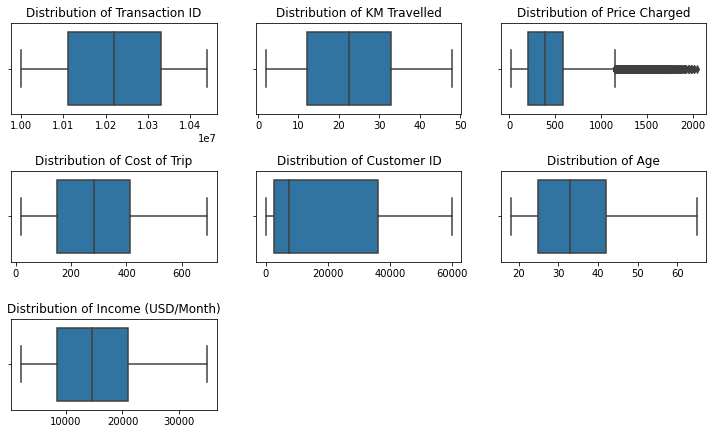

In [21]:
final_Data = Final_cab_data.select_dtypes([int, float])


fig=plt.figure(figsize=(10,10))
for i ,columns in enumerate (final_Data,1):
    ax= plt.subplot(5,3,i)
    sns.boxplot(data= final_Data , x=final_Data[columns])
    ax.set_xlabel(None)
    ax.set_title(f'Distribution of {columns}')
    plt.tight_layout(w_pad=3)
plt.show()



# *Data cleaning and Feature Engineering*


Check if there are duplicates by (duplicated) in dataframe and there are no duplicates in our data

In [22]:

duplicateRows = Final_cab_data[Final_cab_data.duplicated()]
print('The number of duplicated rows', duplicateRows.shape[0])

The number of duplicated rows 0


Rename columns 

In [23]:
for column in Final_cab_data.columns:
    if ' ' in column:
        Final_cab_data = Final_cab_data.rename(columns={column:column.replace(' ','_')})

Change a comma in values of Population and Users to not give an error when we change the datatype to int64

In [24]:
for column in ["Population","Users"] :
    Final_cab_data[column] = Final_cab_data[column].str.replace(',','')

In [25]:
for column in ["Population", "Users"] :
    Final_cab_data[column] = Final_cab_data[column].astype('int64')

Change type of these attributes to be a category

In [26]:
for column in ["Company", "City" , "Payment_Mode" , "Gender" ] :
    Final_cab_data[column] = Final_cab_data[column].astype('category')

In [27]:
Final_cab_data

,Transaction_ID,Date_of_Travel,Company,City,KM_Travelled,Price_Charged,Cost_of_Trip,Customer_ID,Payment_Mode,Gender,Age,Income_(USD/Month),Population,Users
0,10000011,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,29290,Card,Male,28,10813,814885,24701
1,10351127,2018-07-21,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,29290,Cash,Male,28,10813,814885,24701
2,10412921,2018-11-23,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,29290,Card,Male,28,10813,814885,24701
3,10000012,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,27703,Card,Male,27,9237,814885,24701
4,10320494,2018-04-21,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,27703,Card,Male,27,9237,814885,24701
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359387,10307228,2018-03-03,Yellow Cab,WASHINGTON DC,38.40,668.93,525.3120,51406,Cash,Female,29,6829,418859,127001
359388,10319775,2018-04-13,Yellow Cab,WASHINGTON DC,3.57,67.60,44.5536,51406,Cash,Female,29,6829,418859,127001
359389,10347676,2018-07-06,Yellow Cab,WASHINGTON DC,23.46,331.97,337.8240,51406,Card,Female,29,6829,418859,127001
359390,10358624,2018-08-02,Yellow Cab,WASHINGTON DC,27.60,358.23,364.3200,51406,Cash,Female,29,6829,418859,127001


Datatypes for our new dataset

In [28]:
Final_cab_data.dtypes

Transaction_ID                 int64
Date_of_Travel        datetime64[ns]
Company                     category
City                        category
KM_Travelled                 float64
Price_Charged                float64
Cost_of_Trip                 float64
Customer_ID                    int64
Payment_Mode                category
Gender                      category
Age                            int64
Income_(USD/Month)             int64
Population                     int64
Users                          int64
dtype: object

Calculate Profit from Price Charged and cost of trip and Calculate Profit_Rate

In [29]:
Final_cab_data['Profit'] = Final_cab_data['Price_Charged'] - Final_cab_data['Cost_of_Trip']
Final_cab_data
Final_cab_data['Profit_Rate'] = ((Final_cab_data['Price_Charged'] - Final_cab_data['Cost_of_Trip'])/Final_cab_data['Cost_of_Trip'])*100
Final_cab_data


,Transaction_ID,Date_of_Travel,Company,City,KM_Travelled,Price_Charged,Cost_of_Trip,Customer_ID,Payment_Mode,Gender,Age,Income_(USD/Month),Population,Users,Profit,Profit_Rate
0,10000011,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,29290,Card,Male,28,10813,814885,24701,57.3150,18.274427
1,10351127,2018-07-21,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,29290,Cash,Male,28,10813,814885,24701,281.2772,88.612790
2,10412921,2018-11-23,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,29290,Card,Male,28,10813,814885,24701,194.6480,32.582415
3,10000012,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,27703,Card,Male,27,9237,814885,24701,23.6660,7.067558
4,10320494,2018-04-21,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,27703,Card,Male,27,9237,814885,24701,253.9808,54.371732
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359387,10307228,2018-03-03,Yellow Cab,WASHINGTON DC,38.40,668.93,525.3120,51406,Cash,Female,29,6829,418859,127001,143.6180,27.339562
359388,10319775,2018-04-13,Yellow Cab,WASHINGTON DC,3.57,67.60,44.5536,51406,Cash,Female,29,6829,418859,127001,23.0464,51.727358
359389,10347676,2018-07-06,Yellow Cab,WASHINGTON DC,23.46,331.97,337.8240,51406,Card,Female,29,6829,418859,127001,-5.8540,-1.732855
359390,10358624,2018-08-02,Yellow Cab,WASHINGTON DC,27.60,358.23,364.3200,51406,Cash,Female,29,6829,418859,127001,-6.0900,-1.671607


*Split data into two dataset one for Yellow Cab anf one for Pink Cab and start our visualization and analysis on the new datasets*

**Here I splitted MasterData into two dataset for every Cab Firm to analyze them individually.**


In [30]:
Pink_CabData = Final_cab_data [Final_cab_data['Company'] == 'Pink Cab'] 
Yellow_CabData = Final_cab_data [Final_cab_data['Company'] == 'Yellow Cab']

# ***Data Visualization and hypothesis***

**hypothesis: Compare Yellow Cab and Pink Cab from Different Aspects**

which payment method used more across users in pink and yellow cab?

Which gender is the most useable for can and to which company?

Do Customers prefer Yellow Cab to Pink Cab?

What is the average age of the users?

Which company has higher profit ?

Who serves the higher income ?

which month the yellow and pink cab have highest income in 3 years? 









**Visualization**

<AxesSubplot:xlabel='Profit', ylabel='Count'>

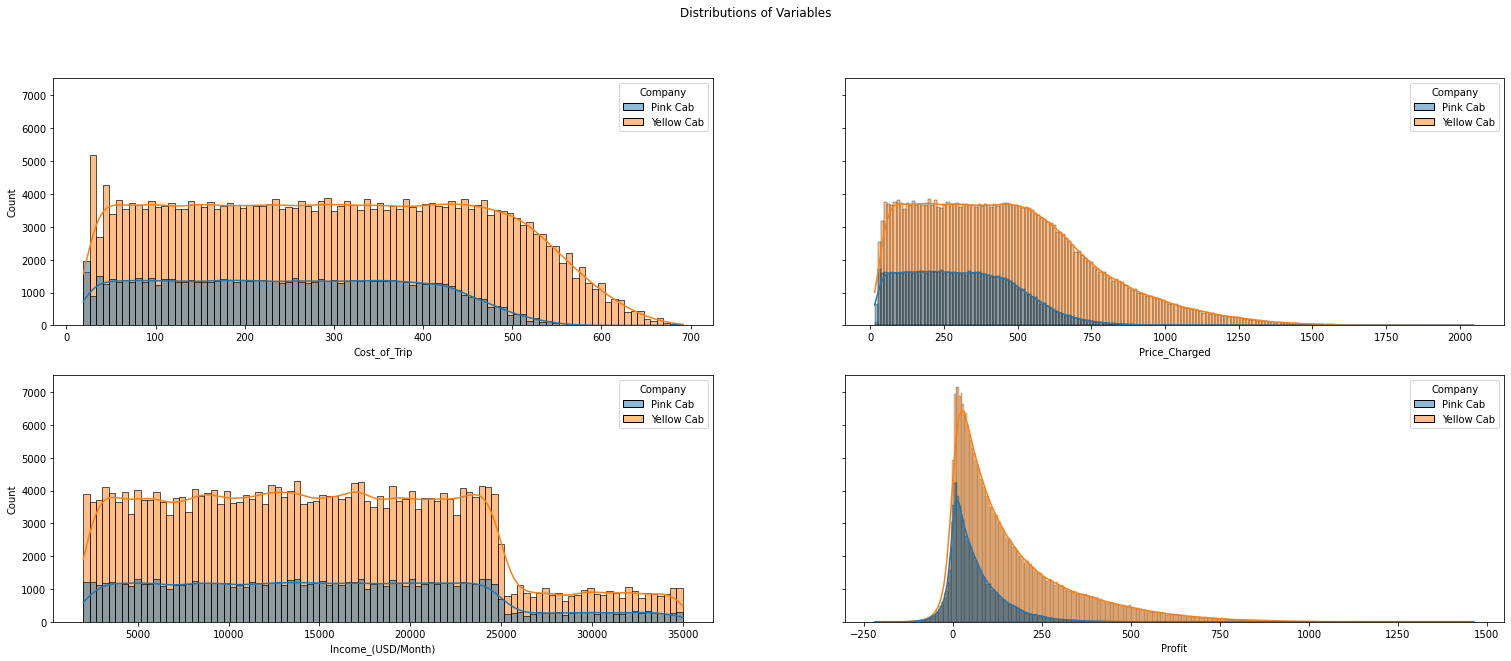

In [31]:
fig,axes = plt.subplots(2, 2 , figsize=(26,10), sharey=True)
fig.suptitle('Distributions of Variables')
sns.histplot(ax=axes[0][0], data=Final_cab_data , x='Cost_of_Trip' , kde = True , hue="Company")
sns.histplot(ax=axes[0][1], data=Final_cab_data , x='Price_Charged' , kde = True , hue="Company")
sns.histplot(ax=axes[1][0], data=Final_cab_data , x='Income_(USD/Month)' , kde = True , hue="Company") 
sns.histplot(ax=axes[1][1], data=Final_cab_data , x='Profit' , kde = True , hue="Company") 

***Those Histograms indicates that yellow cab is higher in  cost of trip , price charged and income that gained in month and profit***

***visualized scatter plots of Data features to see correlations between them if exists***


Text(0.5, 1.0, 'KM_Travelled  - Price_Charged')

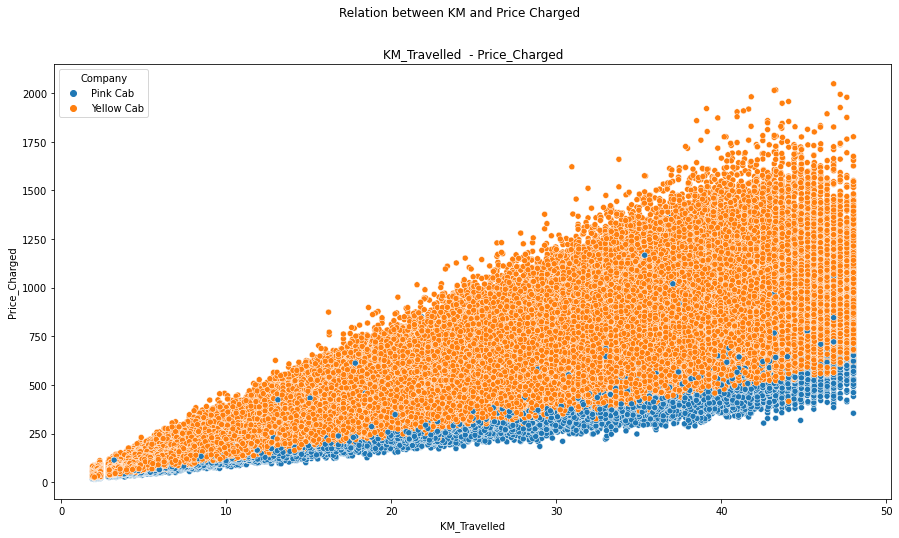

In [32]:

fig,axes = plt.subplots(figsize=(15, 8), sharey=True)
fig.suptitle('Relation between KM and Price Charged')
sns.scatterplot(ax=axes,data=Final_cab_data, x='KM_Travelled', y='Price_Charged' , hue="Company"  ).set_title("KM_Travelled  - Price_Charged")


Text(0.5, 1.0, 'KM_Travelled  - Cost_of_Trip')

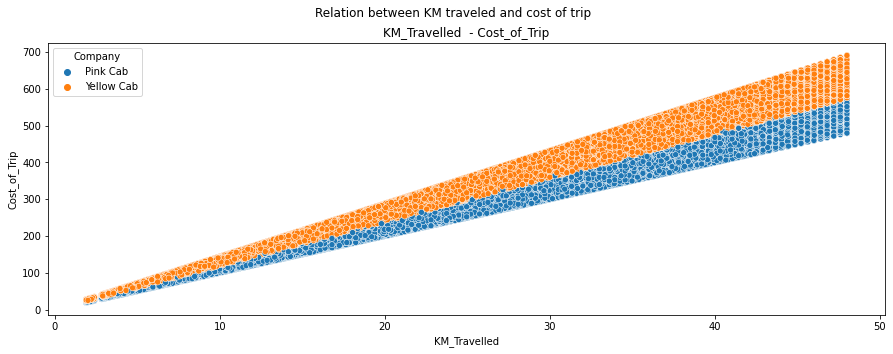

In [33]:
fig,axes = plt.subplots(figsize=(15,5), sharey=True)
fig.suptitle('Relation between KM traveled and cost of trip')
sns.scatterplot(ax=axes,data=Final_cab_data, x='KM_Travelled', y='Cost_of_Trip' , hue="Company").set_title("KM_Travelled  - Cost_of_Trip")

<AxesSubplot:xlabel='Price_Charged', ylabel='Cost_of_Trip'>

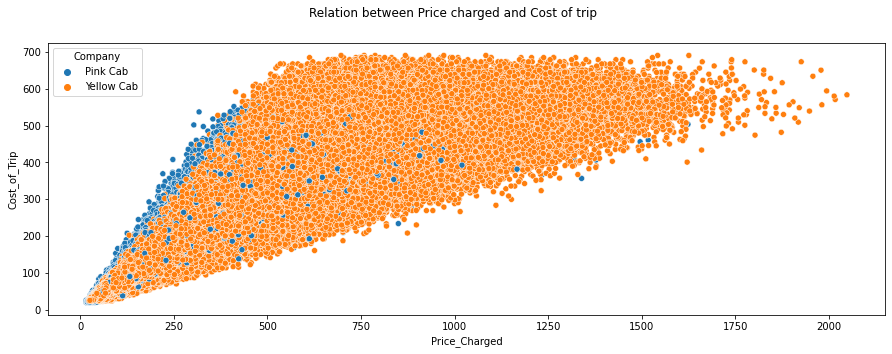

In [34]:

fig,axes = plt.subplots(figsize=(15,5), sharey=True)
fig.suptitle('Relation between Price charged and Cost of trip')
sns.scatterplot(data=Final_cab_data, x='Price_Charged', y='Cost_of_Trip' , hue="Company")

 ***There is a relationship between price charged and  cost of trip when the cost of trip increased the price charged icreased and when KM traveled increases the cost of trip increases and Price charged***

# ***which payment method used more across users in pink and yellow cab?***

*histogram indicaties that both yellow and pink cab credit card is the most payment_mode usres used it to pay to the company*

In [35]:
data_1 = Pink_CabData.groupby("Payment_Mode").count()
data_2 = Yellow_CabData.groupby("Payment_Mode").count()

fig = go.Figure()
fig.add_trace(go.Bar(
                    x=data_1.index,
                    y=data_1['Users'],
                    name='Pink Cab',
                    marker_color='pink' 
                    ))            
fig.add_trace(go.Bar(
                    x=data_2.index,
                    y=data_2['Users'],
                    name='Yellow Cab',
                    marker_color='Yellow'
                    ))
fig.update_layout(
    yaxis_title="Users",
    title="Pink & Yellow Cab Firm Users Distribution Over Payment_Mode" )

Text(0.5, 0, 'Payment Mode')

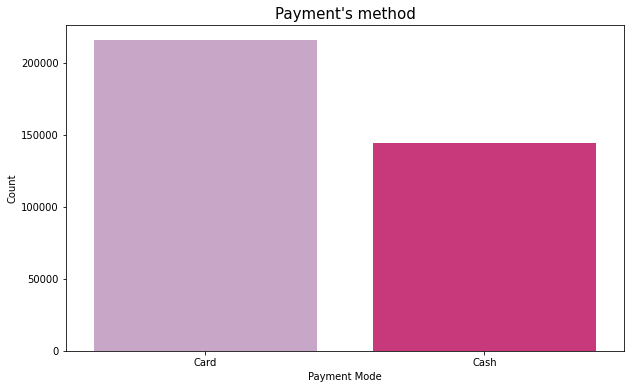

In [36]:
plt.figure(figsize=(10,6))
sns.countplot(data=Final_cab_data, x="Payment_Mode", palette='PuRd')
plt.title("Payment's method", fontsize=15)
plt.ylabel('Count')
plt.xlabel('Payment Mode')

***Histogram indicates that payment method that used across the users tha most is card***

# ***Gender , is it female or male that used the cab more?***

*Based on figure the users are more male then female*

Text(0.5, 0, 'Gender')

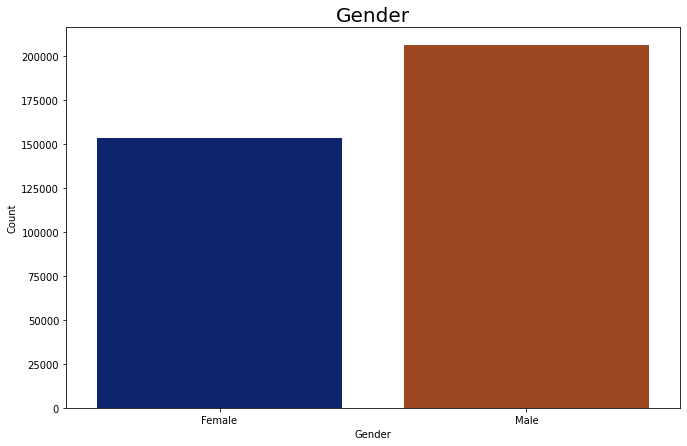

In [37]:
plt.figure(figsize=(11,7))
sns.countplot(data=Final_cab_data, x="Gender", palette='dark')
plt.title('Gender', fontsize=20)
plt.ylabel('Count')
plt.xlabel('Gender')

## ***Which gender is the most useable for can and to which company?***

 *From the graph shown that yellow cab more male users than female and in pink the same but total numbers of male in yellow more than pink and that shown that users used yellow cab more than pink*

In [39]:
data_1 = Pink_CabData.groupby("Gender").count()
data_2 = Yellow_CabData.groupby("Gender").count()

fig = go.Figure()
fig.add_trace(go.Bar(
                    x=data_1.index,
                    y=data_1['Users'],
                    name='Pink Cab',
                    marker_color='pink' 
                    ))            
fig.add_trace(go.Bar(
                    x=data_2.index,
                    y=data_2['Users'],
                    name='Yellow Cab',
                    marker_color='Yellow'
                    ))
fig.update_layout(
    yaxis_title="Users",
    title="Pink & Yellow Cab Firm Users Distribution Over Gender" )

## ***Do Customers prefer Yellow Cab to Pink Cab?***

*The Graph indicates that the numbers of users in  the Yellow Cab is 3 times among pink one*

In [118]:
Users_cal= Final_cab_data.groupby("Company").count()

fig1 = px.pie(Users_cal,
                        values=Users_cal.Users,
                        names=Users_cal.index ,title="Pink & Yellow Cab Firm Total Users Overview"
                       
                        )
fig1.update_traces(
                        textposition='inside',
                        textinfo='value+percent+label',
                       
                        )
fig1.update_layout(width = 600 , height = 400 )


# Average age for the users in yellow and pink 

*The range age  users that used yellow and pink were from 20 to 40 and less users from age 45 to 60 used them*

<AxesSubplot:xlabel='Age', ylabel='Count'>

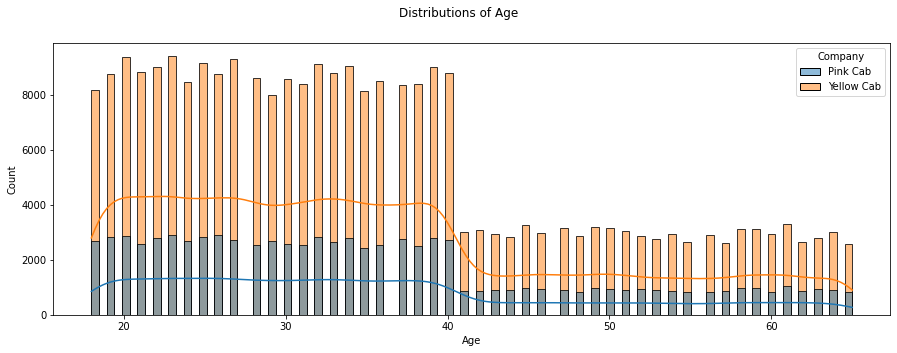

In [41]:

fig,axes = plt.subplots(1, 1 ,figsize=(15,5), sharey=True)
fig.suptitle('Distributions of Age')
sns.histplot(ax=axes,data=Final_cab_data , x='Age' , kde = True , hue="Company")


## ***Which company has higher profit ?***


In [42]:
p=Final_cab_data.groupby(['Company', Final_cab_data.Date_of_Travel.dt.year]).Profit.sum().to_frame('Total Income in month').astype('int64')
p


Total Income in month
Company    Date_of_Travel                       
Pink Cab   2016                          1713511
           2017                          2033654
           2018                          1560162
Yellow Cab 2016                         13926995
           2017                         16575977
           2018                         13517399

In [117]:
dict1 = {"Pink Cab" : [Pink_CabData["Profit"].sum()] ,"Yellow Cab" : [Yellow_CabData["Profit"].sum()] }

data = pd.DataFrame(dict1).T

fig1 = px.pie(data,
                        values=data[0],
                        names=data.index ,title="Total Market Profit Share by Cab Firms"
                        )
fig1.update_traces(
                        textposition='inside',
                        textinfo='value+percent+label'
                        )
fig1.update_layout( width = 600 , height = 600 )

***yellow cab have higher profit share by cab firm than pink cab***

## ***Which company has higher income ?***


In [45]:
q=Final_cab_data.groupby(['Company'])['Income_(USD/Month)'].sum().to_frame('Total Income')
q


,Total Income
Company,
Pink Cab,1275666942
Yellow Cab,4132759631


In [83]:
dict1 = {"Pink Cab" : [Pink_CabData["Income_(USD/Month)"].sum()] ,"Yellow Cab" : [Yellow_CabData["Income_(USD/Month)"].sum()] }

data_income = pd.DataFrame(dict1).T

fig1 = px.pie(data_income,
                        values=data_income[0],
                        names=data_income.index ,title="Total Market Income by Cab Firms across 3 years"
                        )
fig1.update_traces(
                        textposition='inside',
                        textinfo='value+percent+label'
                        )
fig1.update_layout( width = 600 , height = 600 )

***it indicates that Yellow cab across three years was higher total income than Pink cab***

## ***Which month in yellow cab  and pink cab have more income ?***


***Total income cost for every month during the three years in every company , 12 is the highest month in income across 3 years in yelllow cab***

In [80]:
Month_List=Final_cab_data.groupby(['Company', Final_cab_data.Date_of_Travel.dt.month])['Income_(USD/Month)'].sum().to_frame('Total Income in month')
Month_List


Total Income in month
Company    Date_of_Travel                       
Pink Cab   1                            75192262
           2                            51371254
           3                            64084544
           4                            60852931
           5                            75744487
           6                            88324971
           7                            98502423
           8                           117091807
           9                           145717889
           10                          159517246
           11                          165824473
           12                          173442655
Yellow Cab 1                           273518561
           2                           225076755
           3                           262873988
           4                           260061837
           5                           280596458
           6                           282807329
           7                           315099565
           8                           355159647
           9                           410149695
           10                          456509833
           11                          478468777
           12                          532437186

<AxesSubplot:xlabel='Company'>

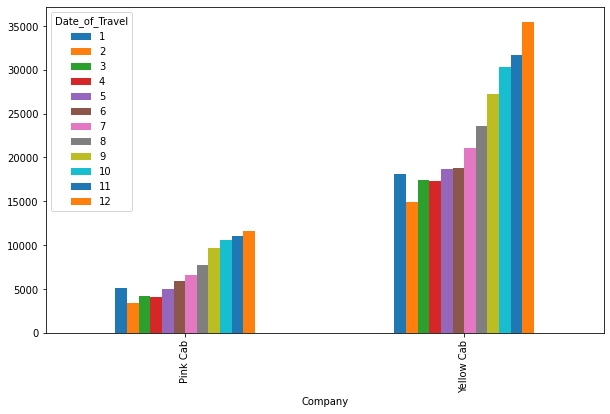

In [116]:
Final_cab_data.groupby(["Company", Final_cab_data.Date_of_Travel.dt.month]).size().unstack(level=1).plot(kind='bar')


***The graph indicate that 12 is the higher income in yellow and have more users and in pink also 12 is the highest income across 3 years***

# ***KM travelled digram***

***As show in this Pie Chart; The total travelled in KM for Yellow Cab is almost 3 times that of Pink Cab.***

In [120]:
total_km= Final_cab_data.groupby("Company")["KM_Travelled"].sum()
total_km = pd.DataFrame(total_km)
fig1 = px.pie(total_km,
                        values=total_km["KM_Travelled"],
                        names=total_km.index ,title="Total KM Travelled by Yellow and Pink cab "
                        )
fig1.update_traces(
                        textposition='inside',
                        textinfo='value+percent+label'
                        )
fig1.update_layout( width = 600 , height = 600 )


# ***Across 20 cities Which city have highest users in yellow and pink cab?***

In [124]:

cities =Yellow_CabData.groupby("City")['Users'].count().sort_values(ascending=False).nlargest(n=20)
cities


City
NEW YORK NY       85918
CHICAGO IL        47264
WASHINGTON DC     40045
LOS ANGELES CA    28168
BOSTON MA         24506
SAN DIEGO CA       9816
ATLANTA GA         5795
DALLAS TX          5637
SEATTLE WA         5265
SILICON VALLEY     4722
MIAMI FL           4452
AUSTIN TX          3028
ORANGE COUNTY      2469
DENVER CO          2431
PHOENIX AZ         1200
NASHVILLE TN       1169
TUCSON AZ          1132
SACRAMENTO CA      1033
PITTSBURGH PA       631
Name: Users, dtype: int64

Text(0.5, 1.0, 'Total Users')

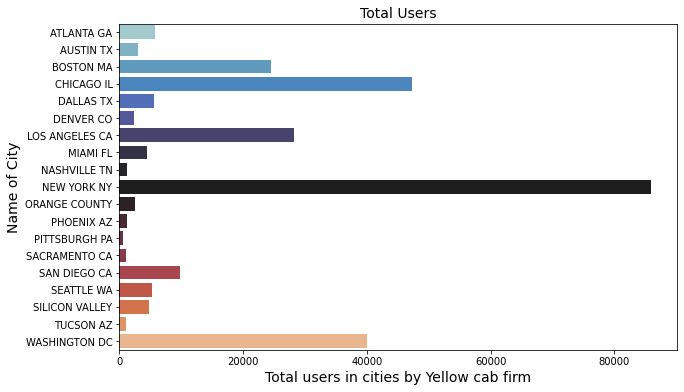

In [127]:
No_city =cities.value_counts().index.sort_values(ascending=False)
total =cities.index

sns.barplot(x=No_city,y = total, palette='icefire')

plt.xlabel("Total users in cities by Yellow cab firm",fontsize = 14)
plt.ylabel("Name of City",fontsize = 14)
plt.title("Total Users",fontsize = 14)

***In the Yellow cab: New York  is the highest city use the yellow cab then Chicago IL***

In [128]:
cities_pink =Pink_CabData.groupby("City")['Users'].count().sort_values(ascending=False).nlargest(n=20)
cities_pink

City
LOS ANGELES CA    19865
NEW YORK NY       13967
SAN DIEGO CA      10672
CHICAGO IL         9361
BOSTON MA          5186
SILICON VALLEY     3797
WASHINGTON DC      3692
SEATTLE WA         2732
MIAMI FL           2002
AUSTIN TX          1868
NASHVILLE TN       1841
ATLANTA GA         1762
ORANGE COUNTY      1513
DENVER CO          1394
DALLAS TX          1380
SACRAMENTO CA      1334
PHOENIX AZ          864
TUCSON AZ           799
PITTSBURGH PA       682
Name: Users, dtype: int64

Text(0.5, 1.0, 'Total Users')

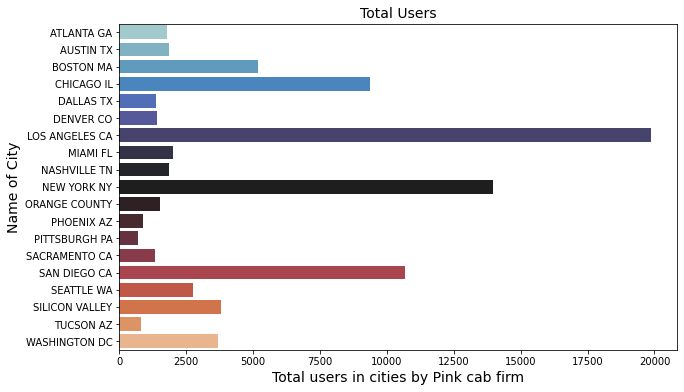

In [129]:
pink_city =cities_pink.value_counts().index.sort_values(ascending=False)
total_users =cities_pink.index

sns.barplot(x=pink_city,y = total_users, palette='icefire')

plt.xlabel("Total users in cities by Pink cab firm",fontsize = 14)
plt.ylabel("Name of City",fontsize = 14)
plt.title("Total Users",fontsize = 14)

***In the Pink cab: Los Angeles CA is the highest city use the Pink cab then New York***


# **⚫Conclusion**
# *When we consider for both Cab Firms in terms of total market profit  , total user share , Total income through 3 years  share , travelled in KM by Users ; we will recommend Yellow Cab Firm for investment since it have the highest values.*